# Read single-trial EEG epochs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from spudtr import epf, DATA_DIR, P3_F, P5_F

In [2]:
epochs_df = pd.read_hdf(DATA_DIR / P3_F, key="p3")

# specify the epoch_id, time stamps and columns with EEG data
eeg_channels = ['MiPf', 'MiCe', 'MiPa', 'MiOc', 'A2']

# check the epochs format
epf.check_epochs(epochs_df, eeg_channels, epoch_id="epoch_id", time="time_ms")

# preview the entire dataframe
epochs_df

,epoch_id,time_ms,event_code,eeg_artifact,participant,MiPf,MiCe,MiPa,MiOc,A2,stim,accuracy,acc_type,exp
0,0,-500,0,0,demonstration,-51.0,29.343750,40.312500,7.531250,7.382812,target,correct,hit,p3
1,0,-496,0,0,demonstration,-47.5,32.375000,43.406250,11.414062,8.367188,target,correct,hit,p3
2,0,-492,0,0,demonstration,-49.0,29.843750,41.750000,7.773438,3.937500,target,correct,hit,p3
3,0,-488,0,0,demonstration,-50.5,28.828125,40.062500,7.773438,1.722656,target,correct,hit,p3
4,0,-484,0,0,demonstration,-50.0,30.093750,37.687500,3.644531,0.984375,target,correct,hit,p3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296995,791,980,0,0,demonstration,4.0,15.171875,15.984375,1.700195,-2.460938,all,all,all,p3
296996,791,984,0,0,demonstration,-2.5,13.406250,13.835938,0.728516,-6.398438,all,all,all,p3
296997,791,988,0,0,demonstration,7.0,25.046875,25.765625,14.335938,6.890625,all,all,all,p3
296998,791,992,0,0,demonstration,1.5,22.765625,24.328125,12.390625,4.429688,all,all,all,p3


# Common A1 to average mastoid reference

a.k.a. "bimastoid", "linked mastoid"

> Warning, only valid for EEG recorded with a common A1 reference 

In [3]:
epf.re_reference(
    epochs_df, 
    eeg_channels, 
    'A2', 
    "linked_pair",
    epoch_id="epoch_id", time="time_ms",
)

,epoch_id,time_ms,event_code,eeg_artifact,participant,MiPf,MiCe,MiPa,MiOc,A2,stim,accuracy,acc_type,exp
0,0,-500,0,0,demonstration,-54.691406,25.652344,36.621094,3.839844,3.691406,target,correct,hit,p3
1,0,-496,0,0,demonstration,-51.683594,28.191406,39.222656,7.230469,4.183594,target,correct,hit,p3
2,0,-492,0,0,demonstration,-50.968750,27.875000,39.781250,5.804688,1.968750,target,correct,hit,p3
3,0,-488,0,0,demonstration,-51.361328,27.966797,39.201172,6.912109,0.861328,target,correct,hit,p3
4,0,-484,0,0,demonstration,-50.492188,29.601562,37.195312,3.152344,0.492188,target,correct,hit,p3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296995,791,980,0,0,demonstration,5.230469,16.402344,17.214844,2.930664,-1.230469,all,all,all,p3
296996,791,984,0,0,demonstration,0.699219,16.605469,17.035156,3.927734,-3.199219,all,all,all,p3
296997,791,988,0,0,demonstration,3.554688,21.601562,22.320312,10.890625,3.445312,all,all,all,p3
296998,791,992,0,0,demonstration,-0.714844,20.550781,22.113281,10.175781,2.214844,all,all,all,p3


# New common reference

> Note: Only valid for common reference EEG data.

For example change from common A1 reference to a vertex or nose tip common reference.

Note: new the new reference = 0 as expected.

In [4]:
# vertex location is MiCe
epf.re_reference(
    epochs_df, 
    eeg_channels, 
    'MiCe',
    "new_common", 
    epoch_id='epoch_id', 
    time='time_ms'
)

,epoch_id,time_ms,event_code,eeg_artifact,participant,MiPf,MiCe,MiPa,MiOc,A2,stim,accuracy,acc_type,exp
0,0,-500,0,0,demonstration,-80.343750,0.0,10.968750,-21.812500,-21.960938,target,correct,hit,p3
1,0,-496,0,0,demonstration,-79.875000,0.0,11.031250,-20.960938,-24.007812,target,correct,hit,p3
2,0,-492,0,0,demonstration,-78.843750,0.0,11.906250,-22.070312,-25.906250,target,correct,hit,p3
3,0,-488,0,0,demonstration,-79.328125,0.0,11.234375,-21.054688,-27.105469,target,correct,hit,p3
4,0,-484,0,0,demonstration,-80.093750,0.0,7.593750,-26.449219,-29.109375,target,correct,hit,p3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296995,791,980,0,0,demonstration,-11.171875,0.0,0.812500,-13.471680,-17.632812,all,all,all,p3
296996,791,984,0,0,demonstration,-15.906250,0.0,0.429688,-12.677734,-19.804688,all,all,all,p3
296997,791,988,0,0,demonstration,-18.046875,0.0,0.718750,-10.710938,-18.156250,all,all,all,p3
296998,791,992,0,0,demonstration,-21.265625,0.0,1.562500,-10.375000,-18.335938,all,all,all,p3


# Common average reference

Note: for demonstration only, a real application would use all scalp locations

In [5]:
reference_channels = ["MiPf", "MiCe", "MiPa", "MiOc", "A2"]
epf.re_reference(
    epochs_df, 
    eeg_channels, 
    reference_channels ,
    "common_average", 
    epoch_id='epoch_id', 
    time='time_ms'
)

,epoch_id,time_ms,event_code,eeg_artifact,participant,MiPf,MiCe,MiPa,MiOc,A2,stim,accuracy,acc_type,exp
0,0,-500,0,0,demonstration,-57.714062,22.629688,33.598438,0.817187,0.668750,target,correct,hit,p3
1,0,-496,0,0,demonstration,-57.112499,22.762501,33.793751,1.801562,-1.245313,target,correct,hit,p3
2,0,-492,0,0,demonstration,-55.860939,22.982813,34.889061,0.912500,-2.923438,target,correct,hit,p3
3,0,-488,0,0,demonstration,-56.077343,23.250782,34.485157,2.196094,-3.854688,target,correct,hit,p3
4,0,-484,0,0,demonstration,-54.482033,25.611719,33.205467,-0.837500,-3.497656,target,correct,hit,p3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296995,791,980,0,0,demonstration,-2.879102,8.292773,9.105273,-5.178906,-9.340039,all,all,all,p3
296996,791,984,0,0,demonstration,-6.314453,9.591797,10.021484,-3.085938,-10.212891,all,all,all,p3
296997,791,988,0,0,demonstration,-8.807813,9.239062,9.957812,-1.471875,-8.917188,all,all,all,p3
296998,791,992,0,0,demonstration,-11.582812,9.682813,11.245313,-0.692187,-8.653125,all,all,all,p3


# Center EEG data in an interval (baseline)

> The `start` and `stop` interval units are the same as the time channel

In [6]:
start = -500
stop = -4
epf.center_eeg(
    epochs_df, 
    eeg_channels, 
    start, 
    stop, 
    epoch_id='epoch_id', 
    time='time_ms'
)

center_eeg is correct


,epoch_id,time_ms,event_code,eeg_artifact,participant,MiPf,MiCe,MiPa,MiOc,A2,stim,accuracy,acc_type,exp
0,0,-500,0,0,demonstration,-4.516129,0.034401,3.084206,1.846008,-1.777974,target,correct,hit,p3
1,0,-496,0,0,demonstration,-1.016129,3.065651,6.177956,5.728821,-0.793599,target,correct,hit,p3
2,0,-492,0,0,demonstration,-2.516129,0.534401,4.521706,2.088196,-5.223287,target,correct,hit,p3
3,0,-488,0,0,demonstration,-4.016129,-0.481224,2.834206,2.088196,-7.438130,target,correct,hit,p3
4,0,-484,0,0,demonstration,-3.516129,0.784401,0.459206,-2.040710,-8.176412,target,correct,hit,p3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296995,791,980,0,0,demonstration,10.750000,11.535234,10.257504,1.543593,-5.826739,all,all,all,p3
296996,791,984,0,0,demonstration,4.250000,9.769609,8.109066,0.571913,-9.764238,all,all,all,p3
296997,791,988,0,0,demonstration,13.750000,21.410234,20.038754,14.179335,3.524824,all,all,all,p3
296998,791,992,0,0,demonstration,8.250000,19.128984,18.601254,12.234022,1.063886,all,all,all,p3


# Exclude previously tagged artifacts

This special-purpose filter drops entire epochs where the time-locking event at time 0 is tagged as bad for some reason on the specified `bads_column`. 

This implements a simple convention for pruning epochs based on tags generated by artifact screening functions.

Any column can be used or constructed for this purpose.

Example: drop all epochs where `eeg_artifact` is other than 0 at `time_ms` == 0 

In [13]:
good_epochs = epf.drop_bad_epochs(
    epochs_df, 
    bads_column="eeg_artifact",
    epoch_id='epoch_id', 
    time='time_ms',
)

print("Total number of epoch ids: ", len(epochs_df["epoch_id"].unique()))
print("Number of good epoch ids: ", len(good_epochs["epoch_id"].unique()))
good_epochs

Total number of epoch ids:  792
Number of good epoch ids:  554


,epoch_id,time_ms,event_code,eeg_artifact,participant,MiPf,MiCe,MiPa,MiOc,A2,stim,accuracy,acc_type,exp
0,0,-500,0,0,demonstration,-51.0,29.343750,40.312500,7.531250,7.382812,target,correct,hit,p3
1,0,-496,0,0,demonstration,-47.5,32.375000,43.406250,11.414062,8.367188,target,correct,hit,p3
2,0,-492,0,0,demonstration,-49.0,29.843750,41.750000,7.773438,3.937500,target,correct,hit,p3
3,0,-488,0,0,demonstration,-50.5,28.828125,40.062500,7.773438,1.722656,target,correct,hit,p3
4,0,-484,0,0,demonstration,-50.0,30.093750,37.687500,3.644531,0.984375,target,correct,hit,p3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296995,791,980,0,0,demonstration,4.0,15.171875,15.984375,1.700195,-2.460938,all,all,all,p3
296996,791,984,0,0,demonstration,-2.5,13.406250,13.835938,0.728516,-6.398438,all,all,all,p3
296997,791,988,0,0,demonstration,7.0,25.046875,25.765625,14.335938,6.890625,all,all,all,p3
296998,791,992,0,0,demonstration,1.5,22.765625,24.328125,12.390625,4.429688,all,all,all,p3


# Filter EEG epochs (keep distorted edges)

1. Design the filter

Filter length=183 distorts the first and last 0.3640  seconds of each epoch (= 91 samples at 250.0 samples / s)


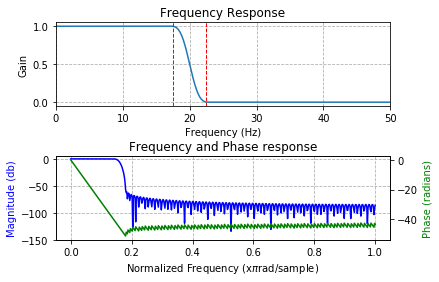

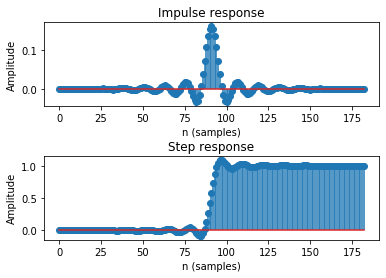

In [8]:
from spudtr import filters

lp_specs = {
    "cutoff_hz": 20,     # 1/2 amplitude frequency Hz
    "width_hz": 5,      # width of the transition band from pass Hz to stop  Hz
    "ripple_db": 60,     # allowable ripple in the pass band, large numbers = less ripple
    "sfreq": 250.0,      # sampling rate in samples/second
    "ftype": "lowpass",  # lowpass, bandpass, highpass
    "window": "kaiser",  # window kaiser, blackman, hamming, ...
}

bode, imp, s_edge, n_edge = filters.show_filter(**lp_specs);  # expand the dictionary with python ** trick

2. apply the filter

In [9]:
epochs_df_lp = epf.fir_filter_epochs(
    epochs_df,
    data_columns=eeg_channels,
    epoch_id="epoch_id",
    time="time_ms",
    trim_edges=False,
    **lp_specs,
    )

times = epochs_df["time_ms"].unique()
epoch_ids = epochs_df["epoch_id"].unique()

3. Compare the output

# Filter EEG epochs, trim distorted edges

In [10]:
epochs_df_lp_trimmed = epf.fir_filter_epochs(
    epochs_df,
    data_columns=eeg_channels,
    epoch_id="epoch_id",
    time="time_ms",
    trim_edges=True,
    **lp_specs,
    )

trimmed_times = epochs_df_lp_trimmed["time_ms"].unique()

Compare the output

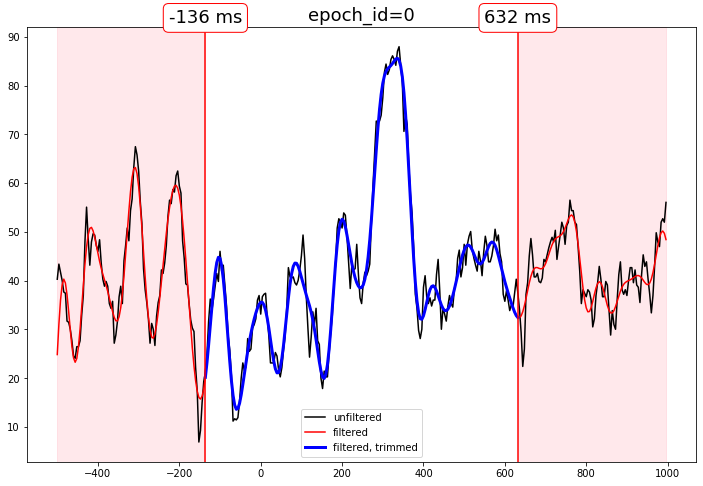

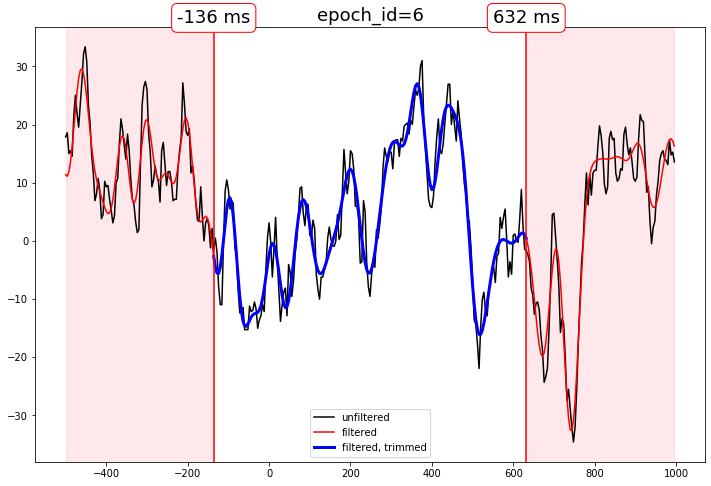

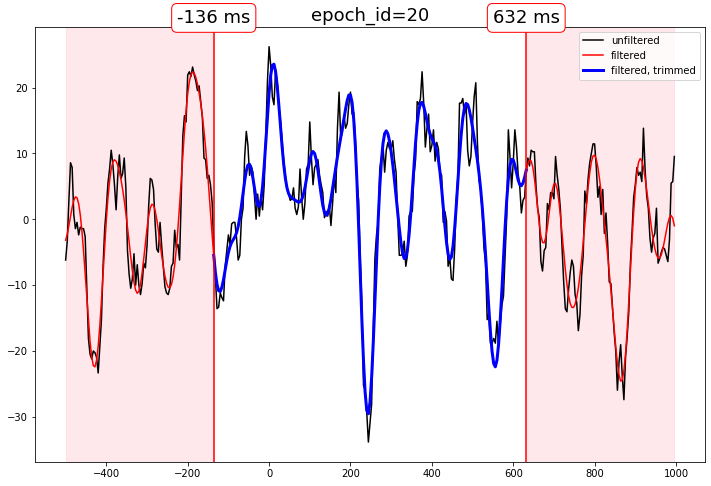

In [11]:
# select some epochs to show
epidxs = [0, 6, 20]
channel = "MiPa"

for epidx in epidxs:

    qstr = f"epoch_id == @epoch_ids[{epidx}]"
    f, ax = plt.subplots(figsize=(12,8))
    ax.set_title(f"epoch_id={epidx}",  fontsize=18)
    
    # unfiltered
    ax.plot(
        times,
        epochs_df.query(qstr)[channel],
        color="black", 
        label="unfiltered"
    )
    
    # filtered, phase compensated with distortion
    ax.plot(
        times,
        epochs_df_lp.query(qstr)[channel],
        color="red", 
        label="filtered"
    )
    
    # filtered, phase compensated, distortion trimmed
    ax.plot(
        trimmed_times,
        epochs_df_lp_trimmed.query(qstr)[channel], 
        color="blue", 
        lw=3, 
        label="filtered, trimmed"
    )

    # decorate the beginning and end of the delay shift distortion regions
    for xtime in [trimmed_times[0], trimmed_times[-1]]:
        
        # beginning and end of the trimmed data
        ax.axvline(xtime, color="red")
        ax.annotate(
            s=f"{str(xtime)} ms", 
            xy=(xtime, ax.get_ylim()[1]), 
            fontsize=18, 
            ha="center", 
            va="bottom",
            bbox=dict(boxstyle="round", ec="red",fc="white")
        )
            
        # highlight the trimmed region
        for bound in [0, -1]:
            ax.axvspan(
                times[bound], 
                trimmed_times[bound], 
                color="pink", 
                alpha=.2
            )
    
    ax.legend()

# Tip: **epoch_specs

Since the epoch_id and time columns are used over and over, set them once early as a dictionary and use the python `**` dictionary expansion trick when running `epf` functions.

In [12]:
epoch_specs = dict(epoch_id = "epoch_id", time="time_ms")
epf.check_epochs(epochs_df, eeg_channels, **epoch_specs)